In [1]:
%pylab inline
import cv2
import numpy as np
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [2]:
tfrecord = "/home/paperspace/DeepOdometry/train_eul.tfrecord"
all_poses = []

In [4]:
def parser(record):
    keys_to_features = {
        "pose": tf.FixedLenFeature((), tf.string, default_value=""),
        "img_raw": tf.FixedLenFeature((), tf.string, default_value=""),
        "img_raw_prev": tf.FixedLenFeature((), tf.string, default_value=""),
    }
    parsed = tf.parse_single_example(record, keys_to_features)

    # Perform additional preprocessing on the parsed data.
    image = tf.image.decode_jpeg(parsed["img_raw"])
    image = tf.reshape(image, [128, 416, 3])
    image_prev = tf.image.decode_jpeg(parsed["img_raw_prev"])
    image_prev = tf.reshape(image_prev, [128, 416, 3])
    
    label = tf.decode_raw(parsed["pose"], tf.float64)
    label = tf.reshape(label, [6])

    return image, image_prev, label

In [5]:
filenames = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames)
dataset = dataset.map(parser)
dataset = dataset.batch(32)
iterator = dataset.make_initializable_iterator()
all_poses = []
with tf.Session() as sess:
    # Initialize 'iterator' with training data
    training_filenames = ["/home/paperspace/DeepOdometry/train_eulcolor.tfrecord"]
    sess.run(iterator.initializer, feed_dict={filenames: training_filenames})
    for i in range(int(18500/32)):
        images, images_prev, labels = iterator.get_next()
        images, images_prev, labels = sess.run([images, images_prev, labels])
        labels = labels.tolist()
        all_poses += labels
    

KeyboardInterrupt: 

In [8]:
print (len(all_poses))
all_poses_arr = np.array(all_poses)
print (all_poses_arr.shape)

18496
(18496, 6)


In [9]:
from sklearn.preprocessing import *

In [10]:
mean = np.mean(all_poses_arr)
std = np.std(all_poses_arr)
print (mean, std)

51.000004827768436 206.22994802284205


In [11]:
all_poses_scaled = all_poses_arr
all_poses_scaled -= mean
all_poses_scaled /= std

In [12]:
print (all_poses_scaled)

[[-0.24752422 -0.2474345  -0.24313302 -0.24729119 -0.24730681 -0.24729936]
 [-0.24775135 -0.24757202 -0.23897465 -0.24728558 -0.24731681 -0.24730193]
 [-0.24797876 -0.24770972 -0.23481091 -0.24727996 -0.24732682 -0.24730449]
 ...
 [ 0.28659948 -0.33108331  0.19323355 -0.24737468 -0.24357654 -0.24751086]
 [ 0.28719541 -0.33111561  0.19428674 -0.24739453 -0.24378947 -0.24754413]
 [ 0.28769777 -0.33113442  0.19523055 -0.24740191 -0.24399114 -0.24756345]]


In [13]:
scaler = StandardScaler().fit(all_poses_arr)
all_poses_scikit = scaler.transform(all_poses_arr)

In [14]:
print (all_poses_scikit)

[[-0.36202167  0.57716197 -0.60062025 -0.51714998 -0.13411623 -0.34933957]
 [-0.36215956  0.57576177 -0.59794085 -0.51649239 -0.13627291 -0.34962146]
 [-0.36229762  0.57435981 -0.59525799 -0.51583278 -0.13843128 -0.34990366]
 ...
 [-0.03775642 -0.27451564 -0.31945249 -0.52694052  0.67026695 -0.37258773]
 [-0.03739463 -0.27484444 -0.31877388 -0.52926815  0.62435178 -0.37624492]
 [-0.03708966 -0.275036   -0.31816575 -0.53013294  0.58086294 -0.37836813]]


In [15]:
print (scaler.mean_)
print (scaler.scale_)

[ 0.34879116 -0.30412134  0.68901725 -0.24288093 -0.24668486 -0.24412127]
[1.64718147 0.09821652 1.55197942 0.008528   0.00463743 0.00909742]


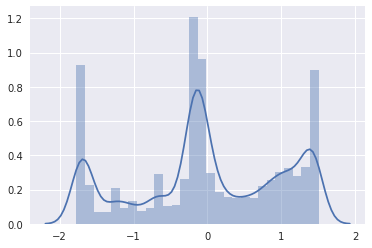

In [18]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(all_poses_scikit[:,4])

In [19]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
print (np.array(data).shape)

(4, 2)


In [20]:
import pickle as p

with open('pose_scaler_eul.p', 'wb') as fp:
    p.dump(scaler, fp)

In [ ]:
filenames = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames)
dataset = dataset.map(parser)
dataset = dataset.batch(1)
dataset = dataset.shuffle(buffer_size=500)
iterator = dataset.make_initializable_iterator()
all_images = []
with tf.Session() as sess:
    # Initialize 'iterator' with training data
    training_filenames = ['/home/paperspace/DeepOdometry/train_eulcolor.tfrecord']
    sess.run(iterator.initializer, feed_dict={filenames: training_filenames})
    for i in range(int(5000)):
        if i %500 == 0:
            print (i)
        images, images_prev, labels = iterator.get_next()
        images, images_prev, labels = sess.run([images, images_prev, labels])
        all_images.append(images)

0
500
1000
1500
2000


In [ ]:
all_images_arr = np.array(all_images).astype('float')
print (all_images_arr.shape)

In [ ]:
all_images_arr = all_images_arr.squeeze()
print (all_images_arr.shape)

In [ ]:
mean = np.mean(all_images_arr)

In [ ]:
std = np.std(all_images_arr)

In [ ]:
print (mean, std)

In [ ]:
all_images_arr -= mean
all_images_arr /= std
print (all_images_arr[0])